Distinguishing AI-Generated from Human-Written Text Using NLP

In [142]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk 
import re
from wordcloud import WordCloud
from nltk import tokenize


In [143]:
import kagglehub

In [145]:
df=pd.read_csv("AI Generated Essays Dataset.csv")


Understanding the data

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1460 non-null   object
 1   generated  1460 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ KB


In [147]:
df.head()

,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


In [148]:
exploratory_df = df.copy()
exploratory_df["generated"].value_counts()

generated
0    1375
1      85
Name: count, dtype: int64

EDA

To understand how the data is split, I created a pie chart to visualize the difference.

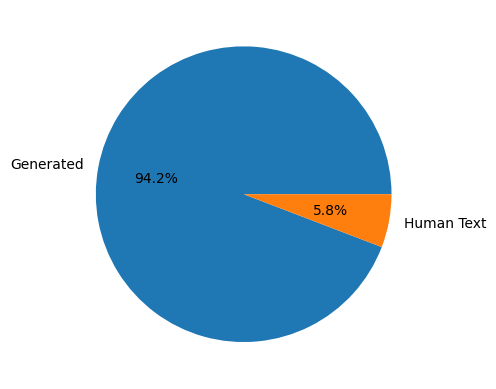

In [149]:
def generated(generated):
    if generated==1: 
        return "Generated"
    else:
        return "Human Text"
exploratory_df['generated'] = exploratory_df['generated'].apply(generated)
plt.pie(exploratory_df['generated'].value_counts(), labels=exploratory_df['generated'].unique().tolist(), autopct='%1.1f%%')
plt.show()

Understanding the different type of text that exists in the data set:

In [150]:
exploratory_df['word_count'] = exploratory_df['text'].apply(lambda x: len(str(x).split()))
exploratory_df.head(10)

,text,generated,word_count
0,"Machine learning, a subset of artificial intel...",Generated,96
1,"A decision tree, a prominent machine learning ...",Generated,103
2,"Education, a cornerstone of societal progress,...",Generated,93
3,"Computers, the backbone of modern technology, ...",Generated,92
4,"Chess, a timeless game of strategy and intelle...",Generated,110
5,"Calculus, a cornerstone of mathematical explor...",Generated,128
6,"Electronics, the backbone of modern technology...",Generated,121
7,"Data Science, a multidisciplinary field at the...",Generated,127
8,"Artificial Intelligence (AI), a branch of comp...",Generated,120
9,"Laptops, compact and portable computing device...",Generated,121


/var/folders/d0/qll_2dnn6cx9ywdkbdzf11940000gn/T/ipykernel_84430/731116491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='generated', y='word_count', data=avg_word_count, palette='viridis')


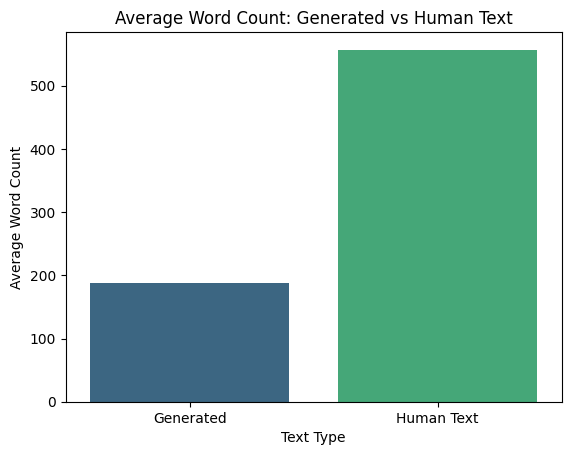

In [151]:
avg_word_count = exploratory_df.groupby('generated')['word_count'].mean().reset_index()

sns.barplot(x='generated', y='word_count', data=avg_word_count, palette='viridis')
plt.xlabel('Text Type')
plt.ylabel('Average Word Count')
plt.title('Average Word Count: Generated vs Human Text')
plt.show()


Clean the data

In [152]:
df["text"]=df["text"].str.lower()
df["text"]=df["text"].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [153]:
type(df["text"][0])

str

In [155]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("punkt")
nltk.download("stopwords")
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vijayavegesna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vijayavegesna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    if not isinstance(text, str):
        return ""
    words = word_tokenize(text)
    filtered = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return " ".join(filtered)

df["text"] = df["text"].apply(clean_and_lemmatize)

df["text"] = df.astype(str).apply(lambda row: " ".join(row.values), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vijayavegesna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vijayavegesna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vijayavegesna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Feature Engineering

In [162]:
print(df["text"].head(10))
print(df["text"].apply(lambda x: len(str(x).split())).describe())

0    machine learning subset artificial intelligenc...
1    decision tree prominent machine learning algor...
2    education cornerstone societal progress extend...
3    computer backbone modern technology revolution...
4    chess timeless game strategy intellect transce...
5    calculus cornerstone mathematical exploration ...
6    electronics backbone modern technology encompa...
7    data science multidisciplinary field intersect...
8    artificial intelligence ai branch computer sci...
9    laptop compact portable computing device becom...
Name: text, dtype: object
count    1460.000000
mean      279.347260
std        95.240977
min        23.000000
25%       222.000000
50%       265.000000
75%       325.250000
max       881.000000
Name: text, dtype: float64


In [165]:
def simple_clean(text):
    if not isinstance(text, str):
        return ""
    return text

df["text"] = df["text"].apply(simple_clean)

Try different types of feature understanding to see which one creates the highest accuracy

In [186]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(df["text"])

bigram_vectorizer = CountVectorizer(ngram_range=(2,2))
bigram_features = bigram_vectorizer.fit_transform(df["text"])

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df["text"])

tfidf_bigram_vectorizer = TfidfVectorizer(ngram_range=(2,2))
tfidf_bigram_features = tfidf_bigram_vectorizer.fit_transform(df["text"])

bow_df = pd.DataFrame(bow_features.toarray(), columns=bow_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
bigram_df = pd.DataFrame(bigram_features.toarray(), columns=bigram_vectorizer.get_feature_names_out())
tfidf_bigram_df = pd.DataFrame(tfidf_bigram_features.toarray(), columns=tfidf_bigram_vectorizer.get_feature_names_out())

print("Bag of Words (unigram):")
print(bow_df.head())
print("TF-IDF (unigram):")
print(tfidf_df.head())
print("Bag of Words (bigram):")
print(bigram_df.head())
print("TF-IDF (bigram):")
print(tfidf_bigram_df.head())

Bag of Words (unigram):
   aa  aaaeal  aactive  aafetoy  aaid  aake  aaken  aarnish  aaron  aart  ...  \
0   0       0        0        0     0     0      0        0      0     0  ...   
1   0       0        0        0     0     0      0        0      0     0  ...   
2   0       0        0        0     0     0      0        0      0     0  ...   
3   0       0        0        0     0     0      0        0      0     0  ...   
4   0       0        0        0     0     0      0        0      0     0  ...   

   ypu  yse  yu  yur  zero  zombie  zone  zoom  zooming  zroom  
0    0    0   0    0     0       0     0     0        0      0  
1    0    0   0    0     0       0     0     0        0      0  
2    0    0   0    0     0       0     0     0        0      0  
3    0    0   0    0     0       0     0     0        0      0  
4    0    0   0    0     0       0     0     0        0      0  

[5 rows x 16635 columns]
TF-IDF (unigram):
    aa  aaaeal  aactive  aafetoy  aaid  aake  aaken  aa

Different models for tfidf features

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_tfidf = tfidf_features  
y_tfidf = df["generated"] 

X_train_y_tfidf, X_test_y_tfidf, y_train_y_tfidf, y_test_y_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_y_tfidf, y_train_y_tfidf)

y_pred_tfidf = lr.predict(X_test_y_tfidf)
print("Accuracy for Logistics Regression for TFIDF feature engineering:", accuracy_score(y_test_y_tfidf, y_pred_tfidf))
print(classification_report(y_test_y_tfidf, y_pred_tfidf))

Accuracy for Logistics Regression for TFIDF feature engineering: 0.952054794520548
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       272
           1       1.00      0.30      0.46        20

    accuracy                           0.95       292
   macro avg       0.98      0.65      0.72       292
weighted avg       0.95      0.95      0.94       292



In [184]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

svm_tfidf = LinearSVC(max_iter=1000)
svm_tfidf.fit(X_train_y_tfidf, y_train_y_tfidf)

y_pred_svm_tfidf = svm_tfidf.predict(X_test_y_tfidf)
print("Accuracy for SVM for TFIDF feature engineering:", accuracy_score(y_test_y_tfidf, y_pred_svm_tfidf))
print(classification_report(y_test_y_tfidf, y_pred_svm_tfidf))

Accuracy for SVM for TFIDF feature engineering: 0.9965753424657534
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      0.95      0.97        20

    accuracy                           1.00       292
   macro avg       1.00      0.97      0.99       292
weighted avg       1.00      1.00      1.00       292



/Users/vijayavegesna/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Different models for bigram

In [ ]:
X_bigram = bigram_features  
y_bigram = df["generated"] 

X_train_y_bigram, X_test_y_bigram, y_train_y_bigram, y_test_y_bigram = train_test_split(X_bigram, y_bigram, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_y_bigram, y_train_y_bigram)

y_pred_bigram = lr.predict(X_test_y_bigram)
print("Accuracy for Logistics Regression for Bigram feature engineering:", accuracy_score(y_test_y_bigram, y_pred_bigram))
print(classification_report(y_test_y_bigram, y_pred_bigram))

Accuracy for Logistics Regression for TFIDF feature engineering: 0.9931506849315068
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.95      0.95      0.95        20

    accuracy                           0.99       292
   macro avg       0.97      0.97      0.97       292
weighted avg       0.99      0.99      0.99       292



In [ ]:
svm_bigram = LinearSVC(max_iter=1000)
svm_bigram.fit(X_train_y_bigram, y_train_y_bigram)

y_pred_svm_bigram = svm_bigram.predict(X_test_y_bigram)
print("Accuracy for SVM for Bigram feature engineering:", accuracy_score(y_test_y_bigram, y_pred_svm_bigram))
print(classification_report(y_test_y_bigram, y_pred_svm_bigram))

Accuracy for SVM for TFIDF feature engineering: 0.9931506849315068
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.95      0.95      0.95        20

    accuracy                           0.99       292
   macro avg       0.97      0.97      0.97       292
weighted avg       0.99      0.99      0.99       292



/Users/vijayavegesna/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Different models for Bag of Words

In [ ]:
X_bow_features = bow_features  
y_bow_features = df["generated"] 

X_train_y_bow_features, X_test_y_bow_features, y_train_y_bow_features, y_test_y_bow_features = train_test_split(X_bow_features, y_bow_features, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_y_bow_features, y_train_y_bow_features)

y_pred_bow_features = lr.predict(X_test_y_bow_features)
print("Accuracy for Logistics Regression for Bag of Words feature engineering:", accuracy_score(y_test_y_bow_features, y_pred_bow_features))
print(classification_report(y_test_y_bow_features, y_pred_bow_features))

Accuracy for Logistics Regression for TFIDF feature engineering: 0.9965753424657534
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      0.95      0.97        20

    accuracy                           1.00       292
   macro avg       1.00      0.97      0.99       292
weighted avg       1.00      1.00      1.00       292



In [196]:
svm_bow = LinearSVC(max_iter=1000)
svm_bow.fit(X_train_y_bow_features, y_train_y_bow_features)

y_pred_svm_bow = svm_bow.predict(X_test_y_bow_features)
print("Accuracy for SVM for Bag of Words feature engineering:", accuracy_score(y_test_y_bow_features, y_pred_svm_bow))
print(classification_report(y_test_y_bow_features, y_pred_svm_bow))

Accuracy for SVM for Bag of Words feature engineering: 0.9965753424657534
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      0.95      0.97        20

    accuracy                           1.00       292
   macro avg       1.00      0.97      0.99       292
weighted avg       1.00      1.00      1.00       292



/Users/vijayavegesna/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Different models for tf-idf bigram

In [ ]:

X_tfidf_bigram_df = tfidf_bigram_df  
y_tfidf_bigram_df = df["generated"] 

X_train_y_tfidf_bigram_df, X_test_y_tfidf_bigram_df, y_train_y_tfidf_bigram_df, y_test_y_tfidf_bigram_df = train_test_split(X_tfidf_bigram_df, y_tfidf_bigram_df, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_y_tfidf_bigram_df, y_train_y_tfidf_bigram_df)

y_pred_tfidf_bigram_df = lr.predict(X_test_y_tfidf_bigram_df)
print("Accuracy for Logistics Regression for TFIDF-bigram feature engineering:", accuracy_score(y_test_y_tfidf_bigram_df, y_pred_tfidf_bigram_df))
print(classification_report(y_test_y_tfidf_bigram_df, y_pred_tfidf_bigram_df))

Accuracy for Logistics Regression for TFIDF feature engineering: 0.9315068493150684
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       272
           1       0.00      0.00      0.00        20

    accuracy                           0.93       292
   macro avg       0.47      0.50      0.48       292
weighted avg       0.87      0.93      0.90       292



/Users/vijayavegesna/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vijayavegesna/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vijayavegesna/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [197]:
X_tfidf_bigram = tfidf_bigram_features
X_train_tfidf_bigram, X_test_tfidf_bigram, y_train_tfidf_bigram, y_test_tfidf_bigram = train_test_split(X_tfidf_bigram, y, test_size=0.2, random_state=42)
svm_tfidf_bigram = LinearSVC(max_iter=1000)
svm_tfidf_bigram.fit(X_train_tfidf_bigram, y_train_tfidf_bigram)
y_pred_tfidf_bigram = svm_tfidf_bigram.predict(X_test_tfidf_bigram)
print("SVM Accuracy (TF-IDF Bigram):", accuracy_score(y_test_tfidf_bigram, y_pred_tfidf_bigram))
print(classification_report(y_test_tfidf_bigram, y_pred_tfidf_bigram))

SVM Accuracy (TF-IDF Bigram): 0.9315068493150684
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       272
           1       0.00      0.00      0.00        20

    accuracy                           0.93       292
   macro avg       0.47      0.50      0.48       292
weighted avg       0.87      0.93      0.90       292



/Users/vijayavegesna/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/vijayavegesna/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vijayavegesna/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vijayavegesna/Library/Python/3.8/lib/python/site-packages/skle